In [ ]:
!pip install pandas matplotlib seaborn numpy scikit-learn

In [3]:
#library imports
import numpy as np
import pandas as pd
import os 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LassoCV

In [7]:
#loading data

df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
#handling missing duplicated data
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [15]:
#drop duplicated data
df.duplicated().sum()

0

In [12]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [16]:
df.shape

(299, 9)

In [20]:
#statastical summary

numerical_summary = df.describe().transpose()
palette = sns.color_palette("viridis", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Year,299.000000,2013.615385,2.896868,2003.000000,2012.000000,2014.000000,2016.000000,2018.000000
Selling_Price,299.000000,4.589632,4.984240,0.100000,0.850000,3.510000,6.000000,35.000000
Present_Price,299.000000,7.541037,8.566332,0.320000,1.200000,6.100000,9.840000,92.600000
Driven_kms,299.000000,36916.752508,39015.170352,500.000000,15000.000000,32000.000000,48883.500000,500000.000000
Owner,299.000000,0.043478,0.248720,0.000000,0.000000,0.000000,0.000000,3.000000


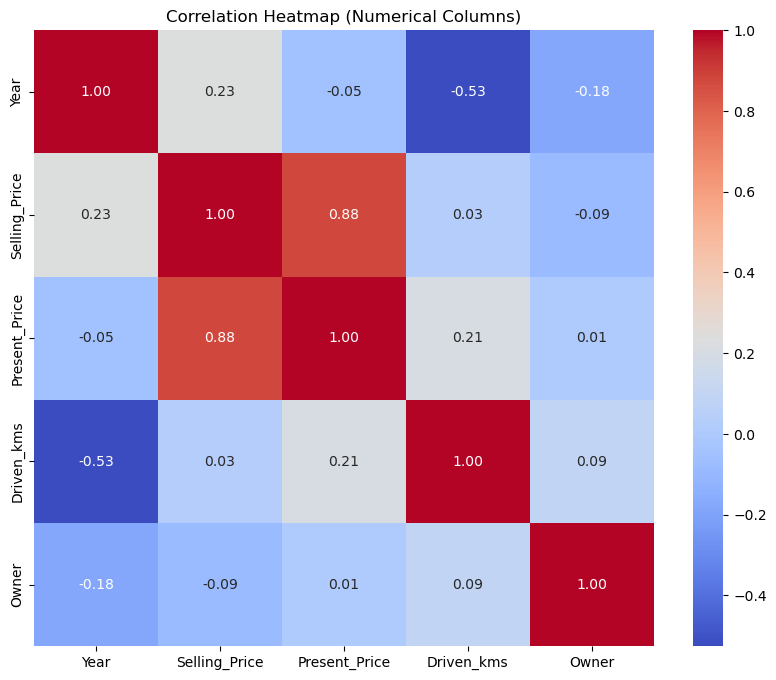

In [21]:
#pairwise correlation heatmap

numerical_columns = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

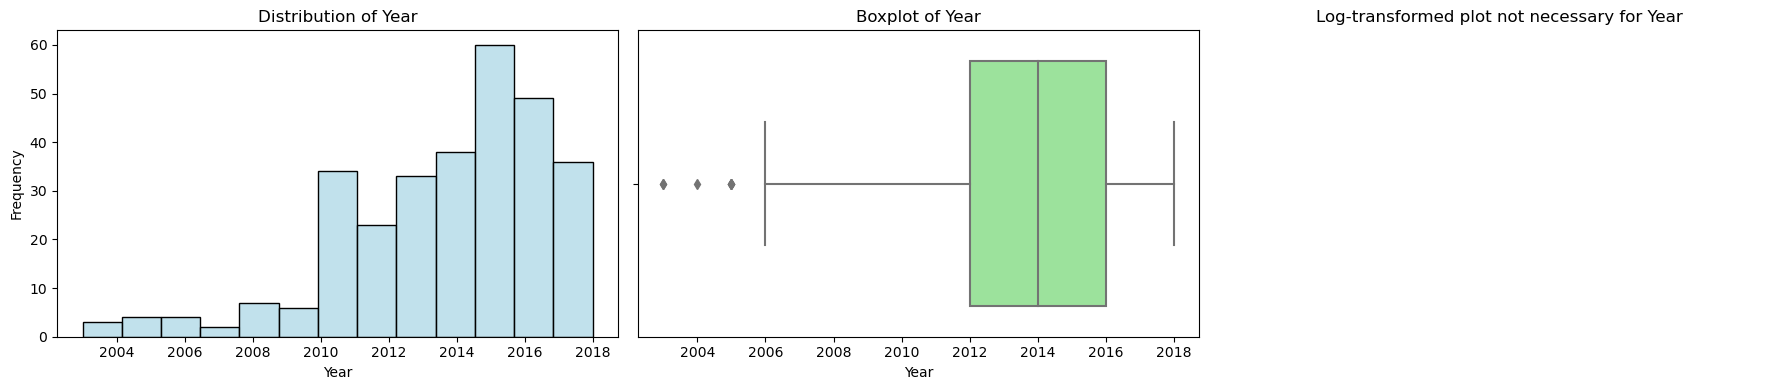

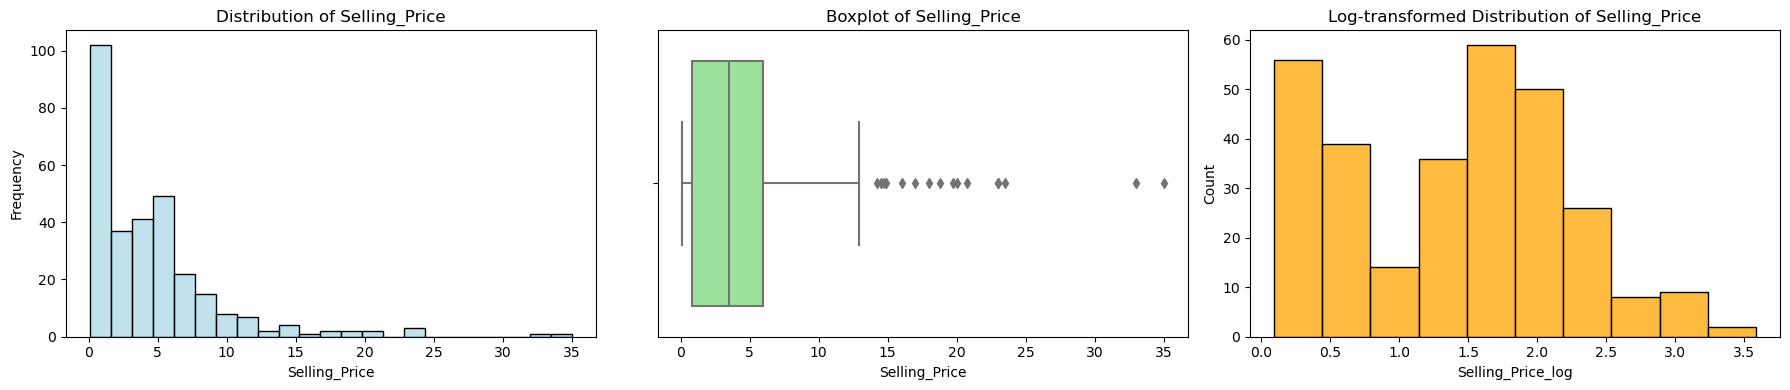

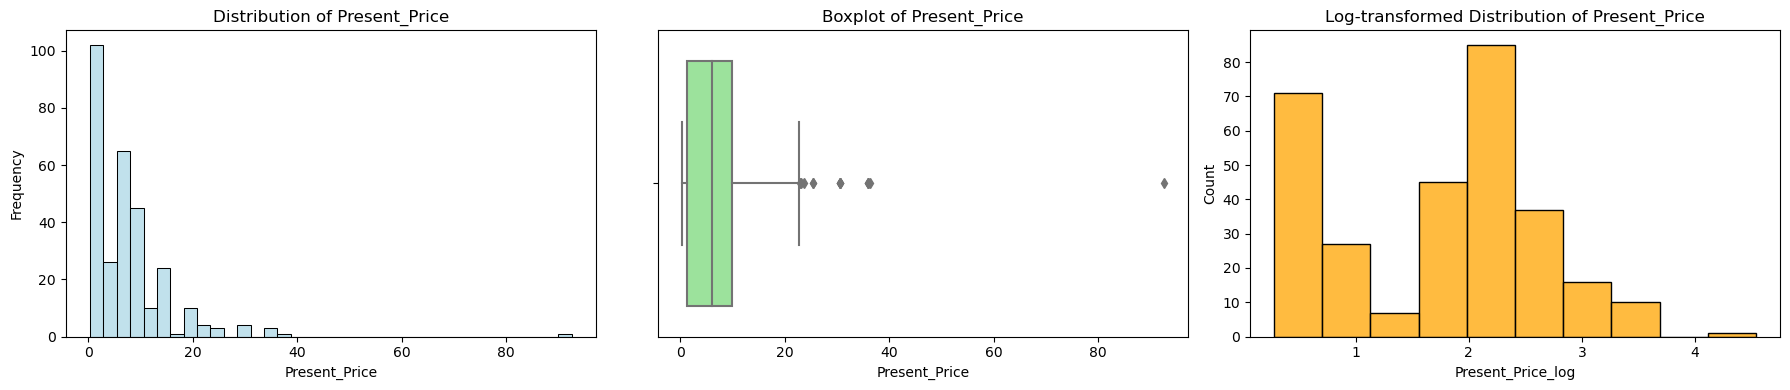

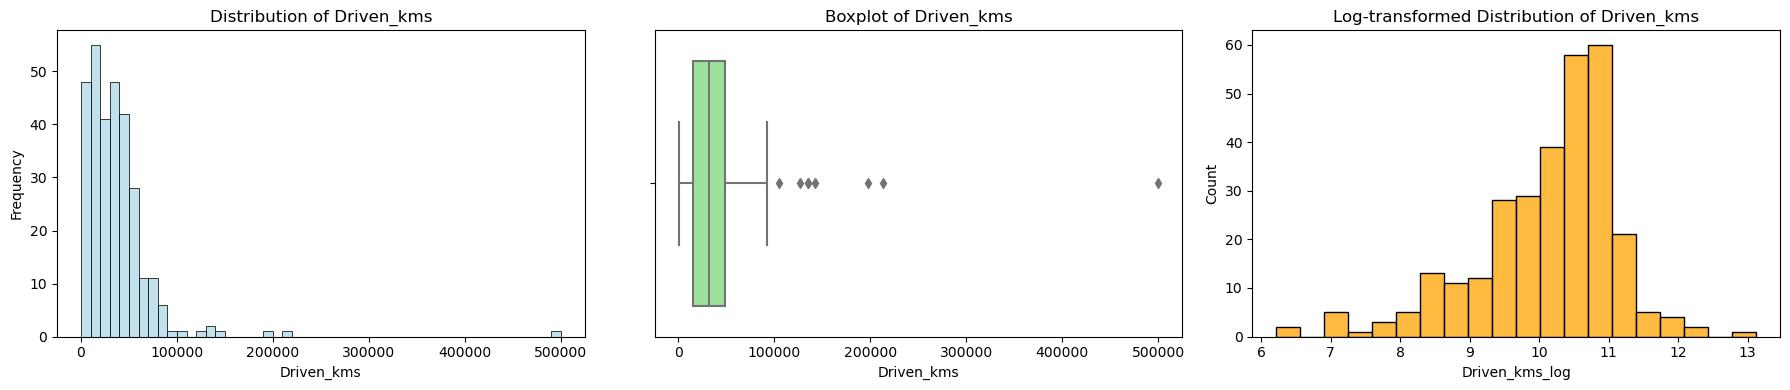

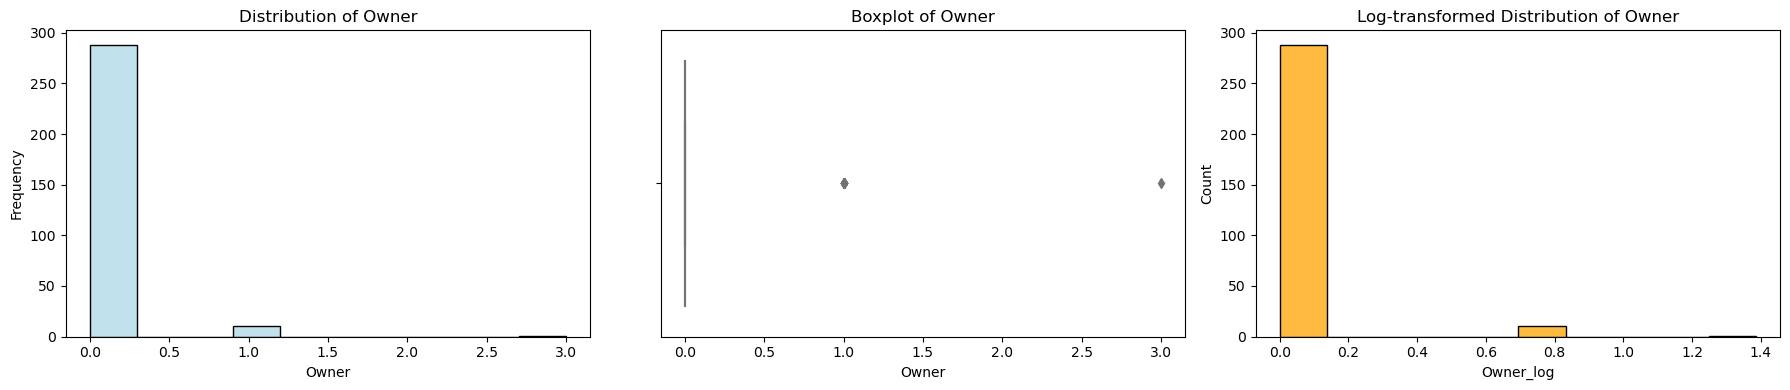

In [26]:
for column in numerical_columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    sns.histplot(df[column], kde=False, color='lightblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')
    sns.boxplot(x=df[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')
    if df[column].skew() > 1:
        df[column+'_log'] = np.log1p(df[column])
        sns.histplot(df[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log Transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log Transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()

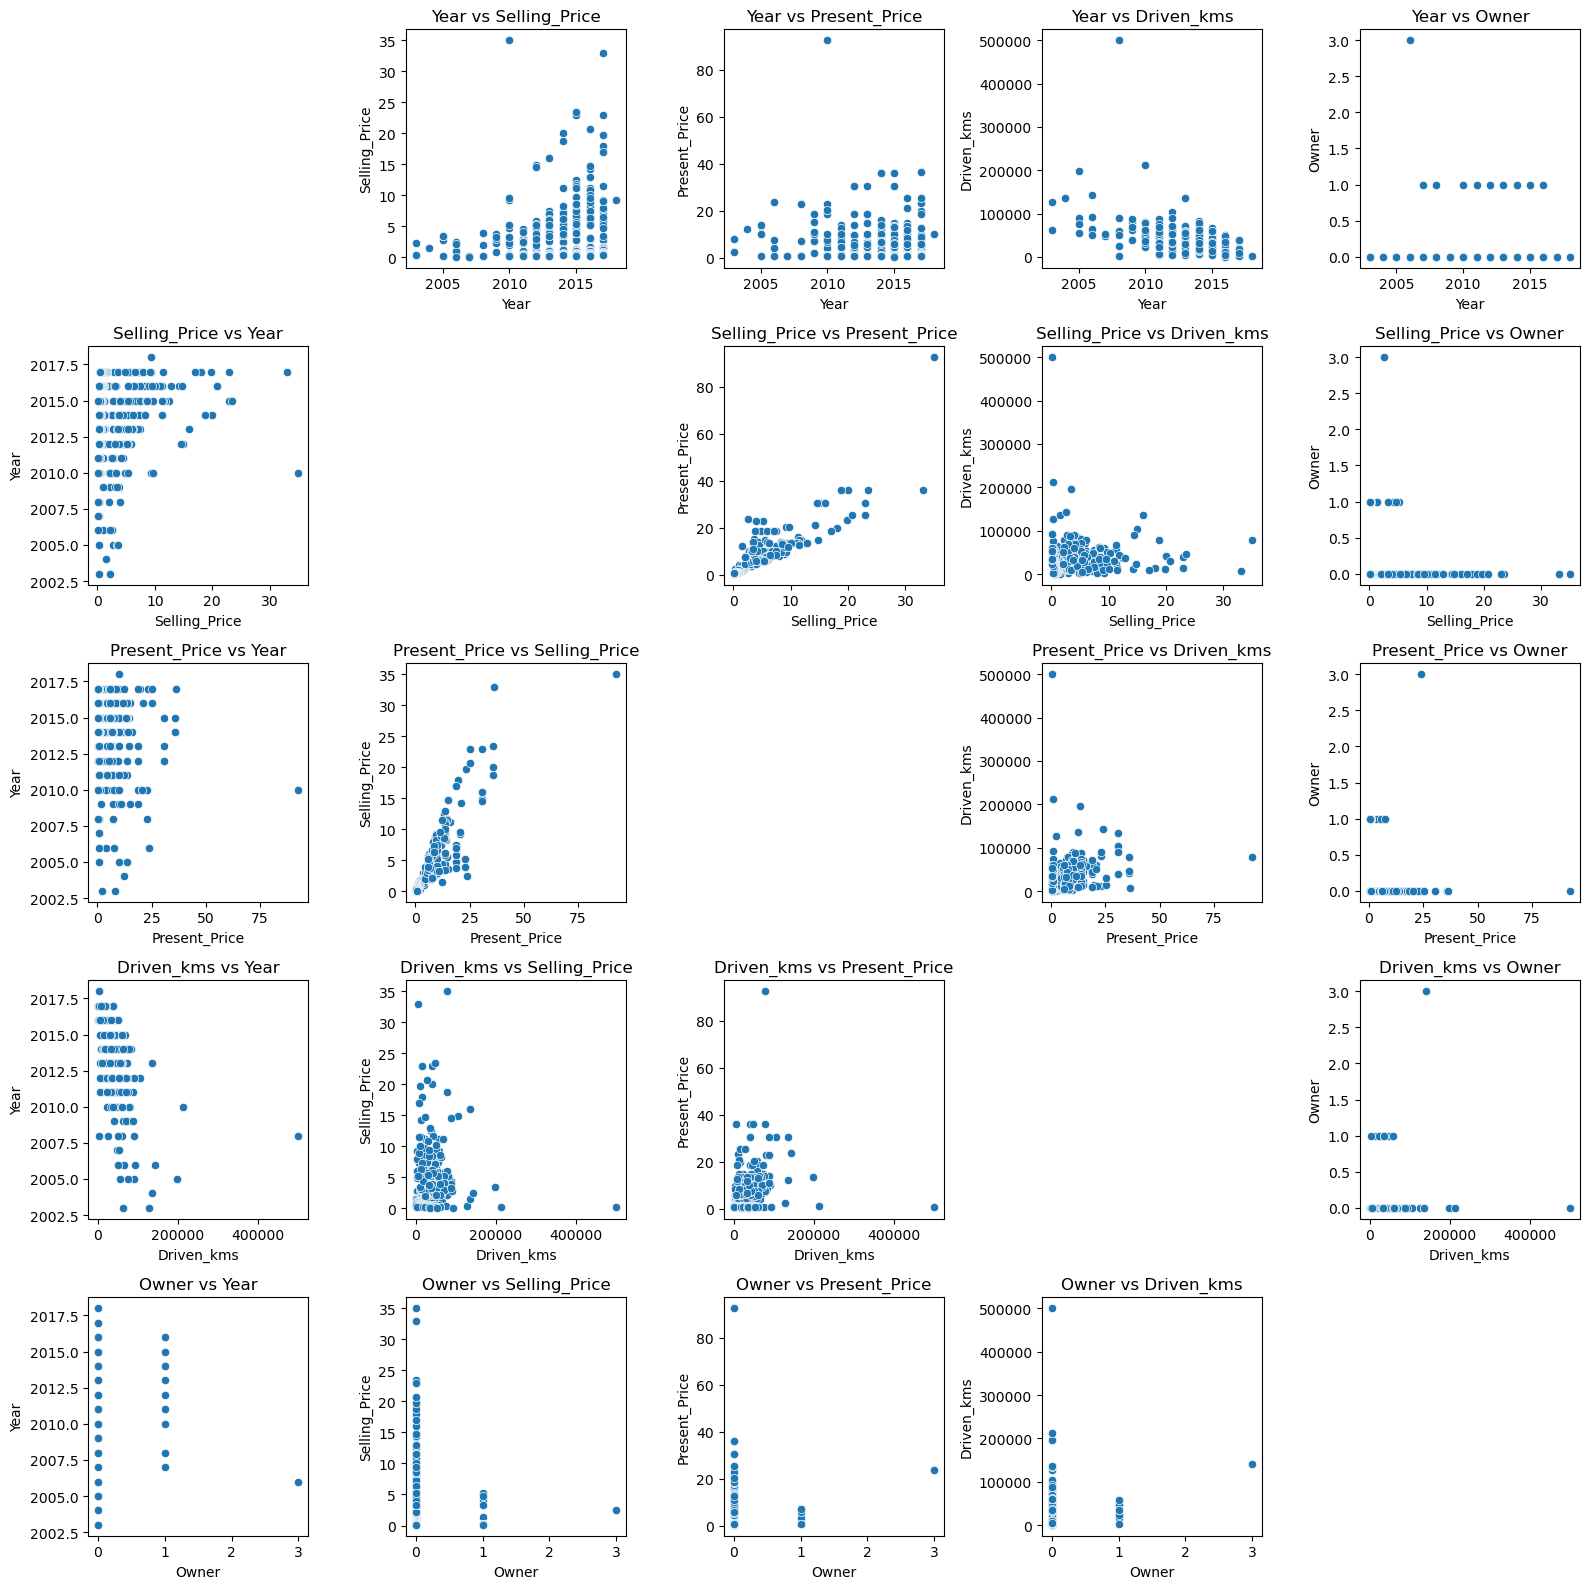

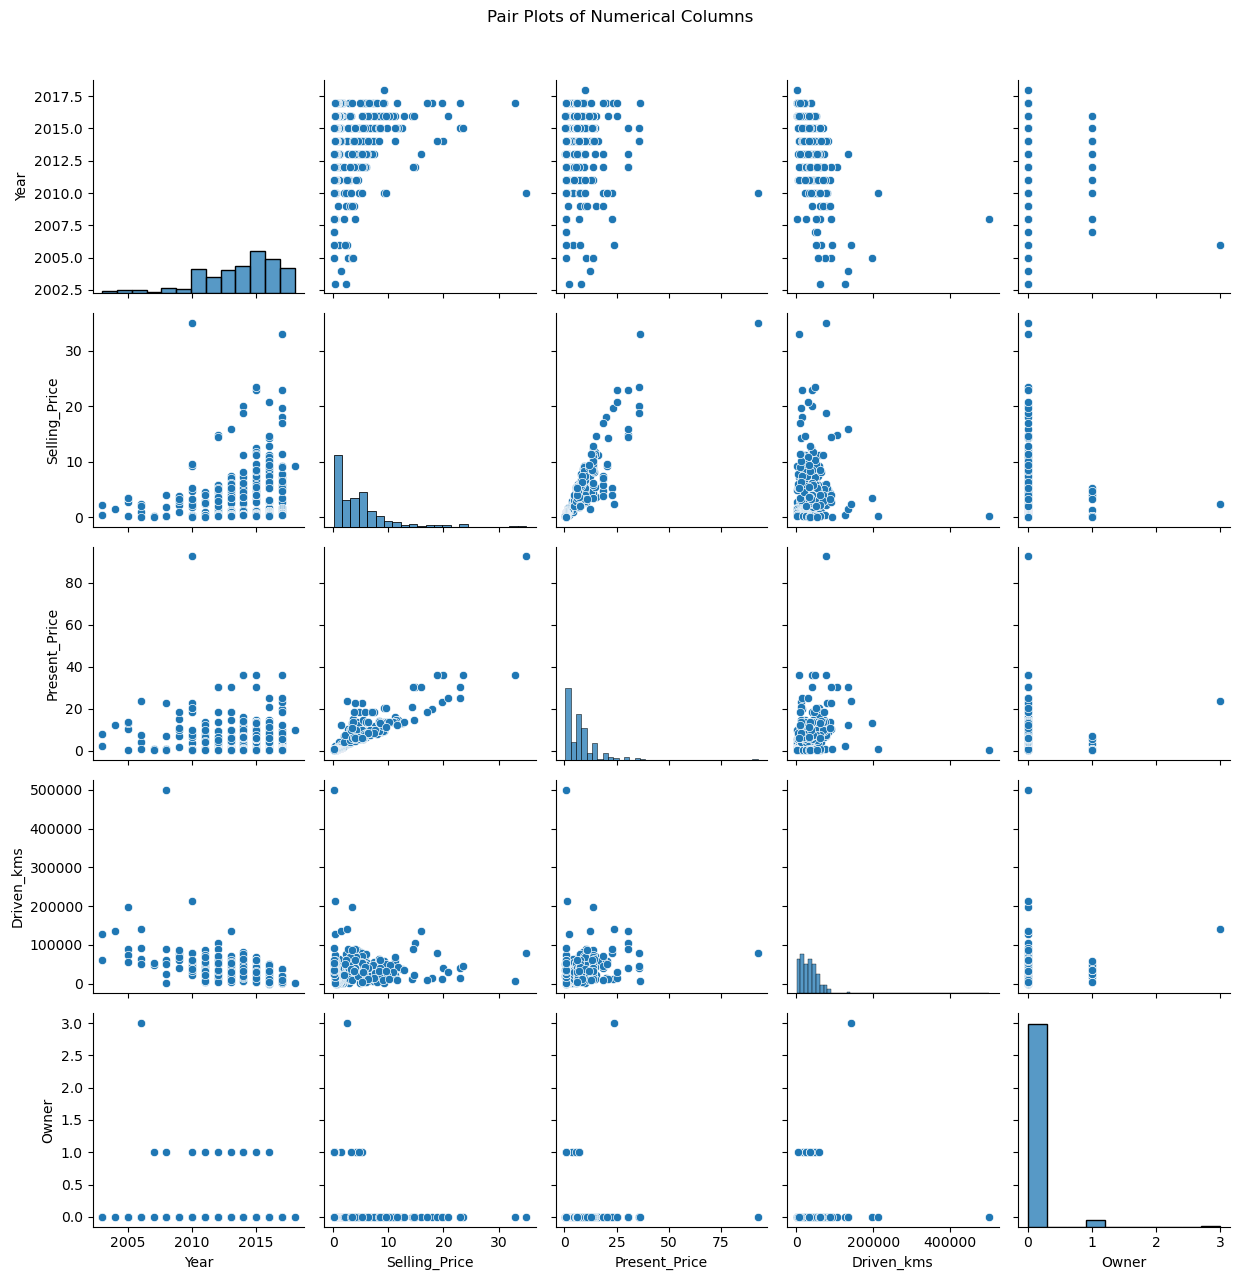

In [29]:
#scatter and pair plots

def scatter_plots(df, numerical_columns):
    num_cols = len(numerical_columns)
    fig, axes = plt.subplots(num_cols, num_cols, figsize=(16, 16))
    for i in range(num_cols):
        for j in range(num_cols):
            if i != j:
                sns.scatterplot(ax=axes[i, j], x=df[numerical_columns[i]], y=df[numerical_columns[j]])
                axes[i, j].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
                axes[i, j].set_xlabel(numerical_columns[i])
                axes[i, j].set_ylabel(numerical_columns[j])
            else:
                axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()
def pair_plots(df, numerical_columns):
    pair_plot = sns.pairplot(df[numerical_columns])
    pair_plot.fig.suptitle('Pair Plots of Numerical Columns', y=1.02)
    plt.tight_layout()
    plt.show()
scatter_plots(df, numerical_columns)
pair_plots(df, numerical_columns)

In [30]:
#encoding

drop_col=['Car_Name']
df.drop(drop_col,inplace=True,axis=1)
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,Fuel_Type,Selling_type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
296,Diesel,Dealer,Manual
297,Petrol,Dealer,Manual
298,Petrol,Dealer,Manual
299,Diesel,Dealer,Manual


In [31]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'Fuel_Type':
['Petrol' 'Diesel' 'CNG']

Unique values in 'Selling_type':
['Dealer' 'Individual']

Unique values in 'Transmission':
['Manual' 'Automatic']



In [33]:
#encoding

df1 = pd.get_dummies(df, columns=object_columns)

In [34]:
df1

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Selling_Price_log,Present_Price_log,Driven_kms_log,Owner_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,1.470176,1.885553,10.203629,0.0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,1.749200,2.355178,10.668979,0.0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,2.110213,2.384165,8.839422,0.0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,1.348073,1.638997,8.556606,0.0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,1.722767,2.063058,10.656106,0.0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,2.351375,2.533697,10.433792,0.0,0,1,0,1,0,0,1
297,2015,4.00,5.90,60000,0,1.609438,1.931521,11.002117,0.0,0,0,1,1,0,0,1
298,2009,3.35,11.00,87934,0,1.470176,2.484907,11.384353,0.0,0,0,1,1,0,0,1
299,2017,11.50,12.50,9000,0,2.525729,2.602690,9.105091,0.0,0,1,0,1,0,0,1


In [35]:
df1.shape

(299, 16)

In [36]:
y=df1['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [37]:
X = df1.drop(['Selling_Price'],axis=1)
X

,Year,Present_Price,Driven_kms,Owner,Selling_Price_log,Present_Price_log,Driven_kms_log,Owner_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,1.470176,1.885553,10.203629,0.0,0,0,1,1,0,0,1
1,2013,9.54,43000,0,1.749200,2.355178,10.668979,0.0,0,1,0,1,0,0,1
2,2017,9.85,6900,0,2.110213,2.384165,8.839422,0.0,0,0,1,1,0,0,1
3,2011,4.15,5200,0,1.348073,1.638997,8.556606,0.0,0,0,1,1,0,0,1
4,2014,6.87,42450,0,1.722767,2.063058,10.656106,0.0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,2.351375,2.533697,10.433792,0.0,0,1,0,1,0,0,1
297,2015,5.90,60000,0,1.609438,1.931521,11.002117,0.0,0,0,1,1,0,0,1
298,2009,11.00,87934,0,1.470176,2.484907,11.384353,0.0,0,0,1,1,0,0,1
299,2017,12.50,9000,0,2.525729,2.602690,9.105091,0.0,0,1,0,1,0,0,1


Top features based on correlation: ['Selling_Price_log', 'Present_Price', 'Present_Price_log', 'Selling_type_Dealer', 'Selling_type_Individual', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual', 'Year', 'Driven_kms_log', 'Owner_log', 'Owner', 'Driven_kms', 'Fuel_Type_CNG']
Top features based on mutual information: ['Selling_Price_log', 'Present_Price', 'Present_Price_log', 'Selling_type_Dealer', 'Selling_type_Individual', 'Year', 'Fuel_Type_Petrol', 'Driven_kms', 'Fuel_Type_Diesel', 'Driven_kms_log', 'Transmission_Automatic', 'Transmission_Manual', 'Owner_log', 'Fuel_Type_CNG', 'Owner']
Top features based on Lasso regression: ['Present_Price', 'Driven_kms']


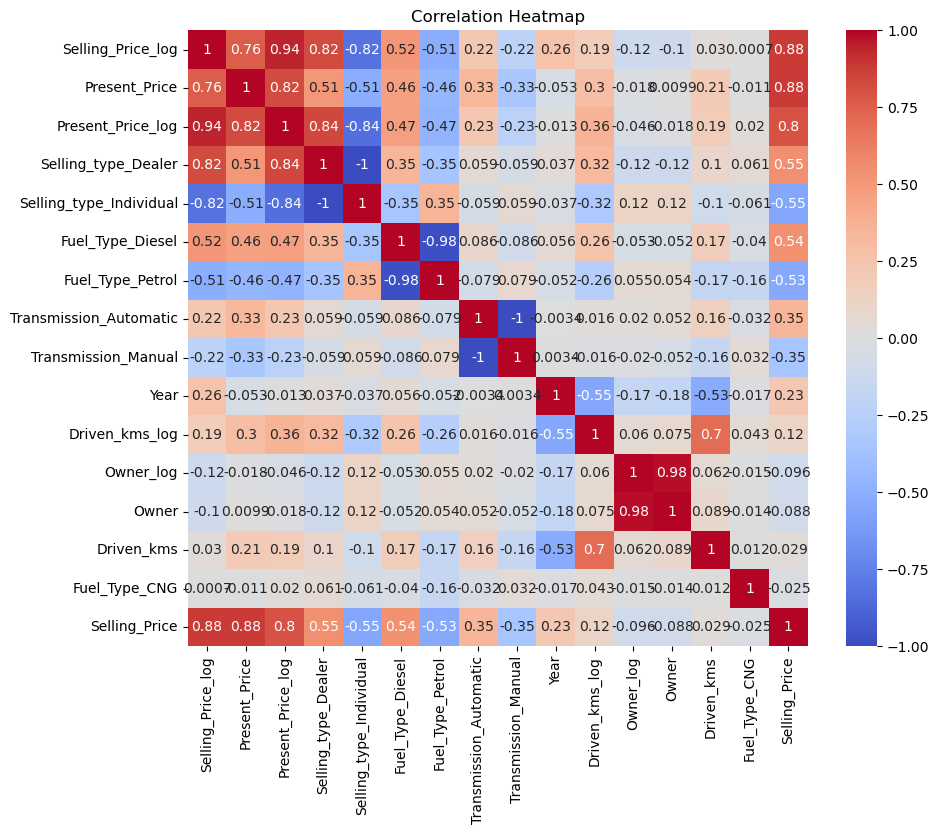

In [38]:
#feature selection

def correlation_analysis(df1, target):
    correlations = df1.corr()[target].drop(target)
    top_features = correlations.abs().sort_values(ascending=False).index.tolist()
    return top_features, correlations

def mutual_information(df1, target):
    X = df1.drop(columns=[target])
    y = df1[target]
    mi = mutual_info_regression(X, y)
    mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
    return mi_series.index.tolist(), mi_series

def lasso_feature_selection(df1, target):
    X = df1.drop(columns=[target])
    y = df1[target]
    lasso = LassoCV(cv=5, random_state=0)
    lasso.fit(X, y)
    coef = pd.Series(lasso.coef_, index=X.columns)
    top_features = coef[coef != 0].index.tolist()
    return top_features, coef

def plot_correlation_heatmap(df1, top_features, target):
    plt.figure(figsize=(10, 8))
    correlation_matrix = df1[top_features + [target]].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()
target = 'Selling_Price'  

# Correlation Analysis
top_features_corr, correlations = correlation_analysis(df1, target)
print("Top features based on correlation:", top_features_corr)

# Mutual Information
top_features_mi, mi_series = mutual_information(df1, target)
print("Top features based on mutual information:", top_features_mi)

# Lasso Regression
top_features_lasso, coef = lasso_feature_selection(df1, target)
print("Top features based on Lasso regression:", top_features_lasso)
plot_correlation_heatmap(df1, top_features_corr, target)

In [39]:
print(df1.columns)

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Selling_Price_log', 'Present_Price_log', 'Driven_kms_log', 'Owner_log',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Selling_type_Dealer', 'Selling_type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')


In [40]:
# feature scaling

TopF=['Selling_Price_log', 'Present_Price', 'Present_Price_log', 'Selling_type_Dealer', 'Selling_type_Individual', 'Year', 'Driven_kms', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Driven_kms_log', 'Transmission_Manual', 'Transmission_Automatic', 'Owner', 'Fuel_Type_CNG', 'Owner_log']
x=df1[TopF]

In [42]:
def remove_redundant_features(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle_matrix.columns if any(upper_triangle_matrix[column] > threshold)]
    df_reduced = df.drop(columns=to_drop)
    
    return df_reduced, to_drop
threshold = 0.9 
x, dropped_features = remove_redundant_features(x, threshold)

print("Dropped Features:", dropped_features)
print("Reduced DataFrame shape:", x.shape)


Dropped Features: []
Reduced DataFrame shape: (299, 10)


In [43]:
x

,Selling_Price_log,Present_Price,Selling_type_Dealer,Year,Driven_kms,Fuel_Type_Diesel,Driven_kms_log,Transmission_Manual,Owner,Fuel_Type_CNG
0,1.470176,5.59,1,2014,27000,0,10.203629,1,0,0
1,1.749200,9.54,1,2013,43000,1,10.668979,1,0,0
2,2.110213,9.85,1,2017,6900,0,8.839422,1,0,0
3,1.348073,4.15,1,2011,5200,0,8.556606,1,0,0
4,1.722767,6.87,1,2014,42450,1,10.656106,1,0,0
...,...,...,...,...,...,...,...,...,...,...
296,2.351375,11.60,1,2016,33988,1,10.433792,1,0,0
297,1.609438,5.90,1,2015,60000,0,11.002117,1,0,0
298,1.470176,11.00,1,2009,87934,0,11.384353,1,0,0
299,2.525729,12.50,1,2017,9000,1,9.105091,1,0,0


In [45]:
x.columns

Index(['Selling_Price_log', 'Present_Price', 'Selling_type_Dealer', 'Year',
       'Driven_kms', 'Fuel_Type_Diesel', 'Driven_kms_log',
       'Transmission_Manual', 'Owner', 'Fuel_Type_CNG'],
      dtype='object')

In [46]:
X = x.drop(['Selling_Price_log', 'Present_Price','Selling_type_Dealer', 'Driven_kms_log','Owner', 'Fuel_Type_CNG'],axis=1)
X

,Year,Driven_kms,Fuel_Type_Diesel,Transmission_Manual
0,2014,27000,0,1
1,2013,43000,1,1
2,2017,6900,0,1
3,2011,5200,0,1
4,2014,42450,1,1
...,...,...,...,...
296,2016,33988,1,1
297,2015,60000,0,1
298,2009,87934,0,1
299,2017,9000,1,1


In [47]:
from sklearn.preprocessing import MinMaxScaler
non_boolean_numerical_features = ['Year', 'Driven_kms']
scaler = MinMaxScaler()
X[non_boolean_numerical_features] = scaler.fit_transform(X[non_boolean_numerical_features])

In [48]:
X

,Year,Driven_kms,Fuel_Type_Diesel,Transmission_Manual
0,0.733333,0.053053,0,1
1,0.666667,0.085085,1,1
2,0.933333,0.012813,0,1
3,0.533333,0.009409,0,1
4,0.733333,0.083984,1,1
...,...,...,...,...
296,0.866667,0.067043,1,1
297,0.800000,0.119119,0,1
298,0.400000,0.175043,0,1
299,0.933333,0.017017,1,1


In [49]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [50]:
#splitting data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
X_train

,Selling_Price_log,Present_Price,Selling_type_Dealer,Year,Driven_kms,Fuel_Type_Diesel,Driven_kms_log,Transmission_Manual,Owner,Fuel_Type_CNG
6,2.047693,8.12,1,2015,18796,0,9.841453,1,0,0
185,0.223144,0.58,0,2008,1900,0,7.550135,0,0,0
187,0.223144,0.51,0,2013,32000,0,10.373522,1,0,0
148,0.418710,0.94,0,2010,45000,0,10.714440,1,0,0
31,1.208960,4.89,1,2011,54200,0,10.900455,1,0,0
...,...,...,...,...,...,...,...,...,...,...
190,0.182322,0.75,0,2008,60000,0,11.002117,1,0,0
72,2.134166,18.61,1,2013,56001,0,10.933143,1,0,0
108,0.788457,1.50,0,2016,18000,0,9.798183,1,0,0
272,2.140066,10.00,1,2015,27600,0,10.225607,1,0,0


In [52]:
y_train

6      6.75
185    0.25
187    0.25
148    0.52
31     2.35
       ... 
190    0.20
72     7.45
108    1.20
272    7.50
104    1.35
Name: Selling_Price, Length: 239, dtype: float64

In [53]:
#training and evalution of the model

#linear regression

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [55]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")


Training MSE: 1.193066278945374
Testing MSE: 5.9633965184462925
Training R2 Score: 0.9513131484019373
Testing R2 Score: 0.7686208107057346


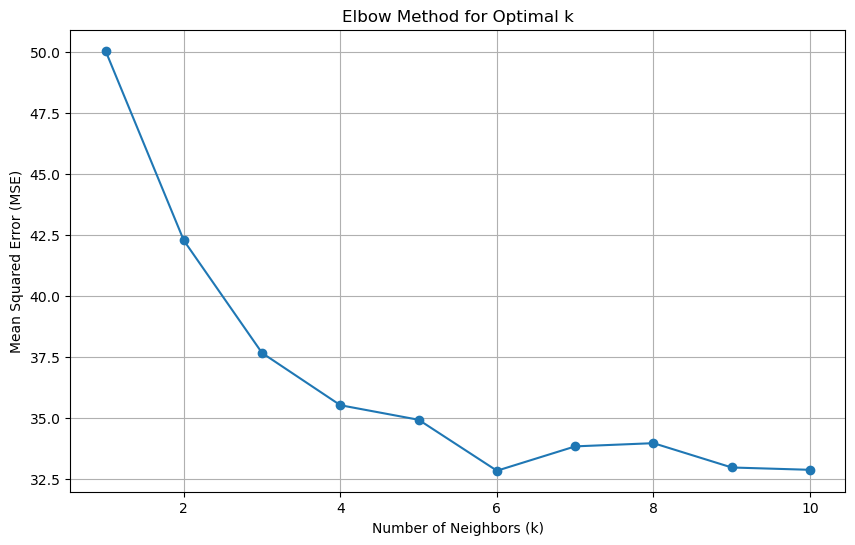

In [56]:
#knn

mse_values = []
r2_values = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [57]:

optimal_k = mse_values.index(min(mse_values)) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")

Optimal number of neighbors (k): 6


In [58]:
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [59]:
# Evaluate the model
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [60]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 17.75086191306369
Testing MSE: 32.838061759259254
Training R2 Score: 0.27561980842926304
Testing R2 Score: -0.2741135164079316


In [61]:
#decsionTreeRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [62]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_dt_regressor = DecisionTreeRegressor(**best_params)
best_dt_regressor.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}


DecisionTreeRegressor(max_depth=9, min_samples_split=5)

In [63]:
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)

In [64]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")


Training MSE: 0.019918479776847978
Testing MSE: 1.7146155439814807
Training R2 Score: 0.9991871632900298
Testing R2 Score: 0.9334730881485734


In [65]:
#model comaprision

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df

,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,1.193066e+00,5.963397,0.951313,0.768621
1,Decision Tree,1.095927e-34,1.570915,1.000000,0.939049
